In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
# setting up the kaggle API
!pip install kaggle

#configuring path for kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

#kaggle datasets download -d venky73/spam-mails-dataset!


In [ ]:
!kaggle datasets download -d venky73/spam-mails-dataset

spam-mails-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/spam-mails-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
mail_data = pd.read_csv('/content/spam_ham_dataset.csv')

In [ ]:
print(mail_data)

      Unnamed: 0  ... label_num
0            605  ...         0
1           2349  ...         0
2           3624  ...         0
3           4685  ...         1
4           2030  ...         0
...          ...  ...       ...
5166        1518  ...         0
5167         404  ...         0
5168        2933  ...         0
5169        1409  ...         0
5170        4807  ...         1

[5171 rows x 4 columns]


In [ ]:
mail_data.shape

(5171, 4)

In [ ]:
mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
# dealing with null values

mail_data.isnull().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

In [ ]:
# encoding category column
mail_data.replace({'Category':{'spam':0,'ham':1}}, inplace=True)

In [ ]:
mail_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_mail_data = re.sub('[^a-zA-Z]', ' ', content) # sub stands for substiute. it will substitute everything except a-z & A-Z with single space ' ' in the content 
  stemmed_mail_data = stemmed_mail_data.lower() # changes to lower case letters
  stemmed_mail_data = stemmed_mail_data.split() # all will be converted to a list
  stemmed_mail_data = [port_stem.stem(word) for word in stemmed_mail_data if not word in stopwords.words('english')]  # stem all the words that are not stop words
  stemmed_mail_data = ' '.join(stemmed_mail_data) # joining the words
  return stemmed_mail_data

In [ ]:
# applying teh stemming function to the content column\
mail_data['text'] = mail_data['text'].apply(stemming)

In [ ]:
# spliting as message and category

X = mail_data['text']
Y = mail_data['label_num']

In [ ]:
# converting the text data to numeric data

vectorizer = TfidfVectorizer()

In [ ]:
vectorizer.fit(X)

TfidfVectorizer()

In [ ]:
X = vectorizer.transform(X)

In [ ]:
print(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


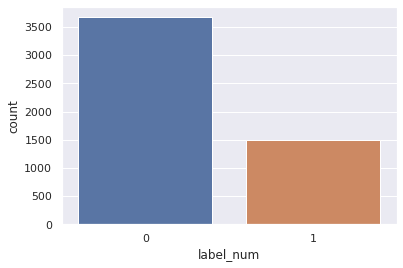

In [ ]:
sns.set()
sns.countplot(mail_data['label_num'])
plt.show()

In [ ]:
# spliting into train data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
regressor = LogisticRegression()

In [ ]:
regressor.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# prediction using training data

X_train_pred = regressor.predict(X_train)

# prediction using test data

X_test_pred = regressor.predict(X_test)


In [ ]:
# accuracy score on training data

train_data_accuracy = accuracy_score(X_train_pred, Y_train)

# accuracy score on test data

test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [ ]:
# printing the accuracy score

print('Training data accuracy score:', train_data_accuracy)

print('Test data accuracy score:', test_data_accuracy)

Training data accuracy score: 0.9946808510638298
Test data accuracy score: 0.9855072463768116


In [ ]:
# building a predictive system

input_data = X_test[1]

prediction = regressor.predict(input_data)

if (prediction==0):
  print('This is a spam mail!')
else:
  print('This is a ham mail!')


This is a ham mail!


In [ ]:
print(Y_test)

2252    0
1868    1
428     0
4834    0
2615    0
       ..
3370    0
176     1
1696    1
1312    0
4651    0
Name: label_num, Length: 1035, dtype: int64


In [ ]:
|